# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download data

In [ ]:

file_path = '/content/drive/MyDrive/MachineLearningFinal/melb_data_cleaned.xlsx'
data = pd.read_excel(file_path)

# Data processing

In [ ]:
# Select the necessary columns
columns = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
           'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname',
           'Propertycount', 'Method', 'Price']
data = data[columns]

In [ ]:
# Handle missing data
data = data.dropna()

In [ ]:
# Convert taxonomy columns to numbers using OneHotEncoder
categorical_columns = ['Type', 'Regionname', 'Method']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
# Combine the encoded columns with the original data
data = data.drop(columns=categorical_columns).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

# Split data into X (feature) and y (target)

In [ ]:

X = data.drop(columns=['Price'])
y = data['Price']

# Normalize data

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with GridSearchCV

In [ ]:

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Find the best alpha value
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [ ]:
# Get the best model from GridSearchCV
best_ridge = grid_search.best_estimator_
print(f"Best alpha: {grid_search.best_params_['alpha']}")

Best alpha: 100


In [ ]:
# Predict with the best Ridge model
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the model

In [ ]:

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [ ]:
# Display evaluation results
metrics_ridge = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R²"],
    "Value": [mae_ridge, mse_ridge, rmse_ridge, r2_ridge]
})
print("Metrics for Ridge Regression:")
print(metrics_ridge)

Metrics for Ridge Regression:
  Metric         Value
0    MAE  2.706746e+05
1    MSE  1.611484e+11
2   RMSE  4.014329e+05
3     R²  6.080840e-01


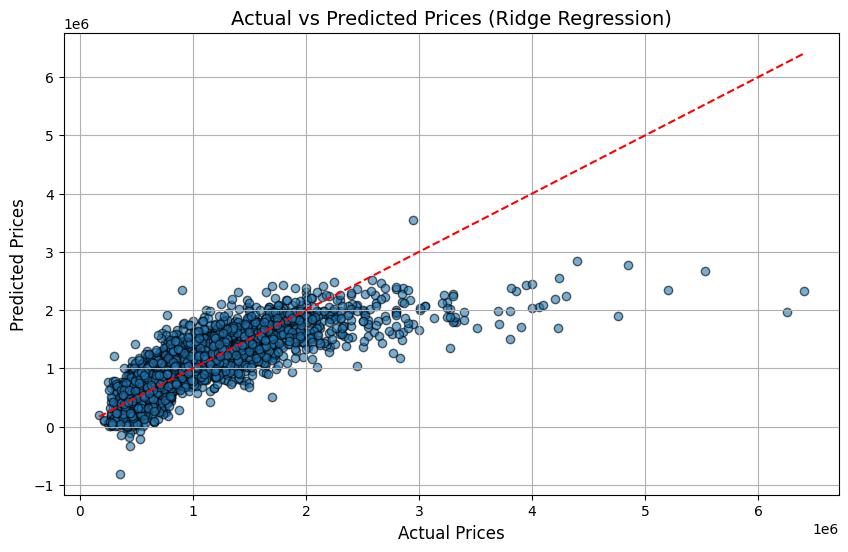

In [ ]:
# Draw a chart comparing predicted price and actual price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Ridge Regression)', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(True)
plt.show()

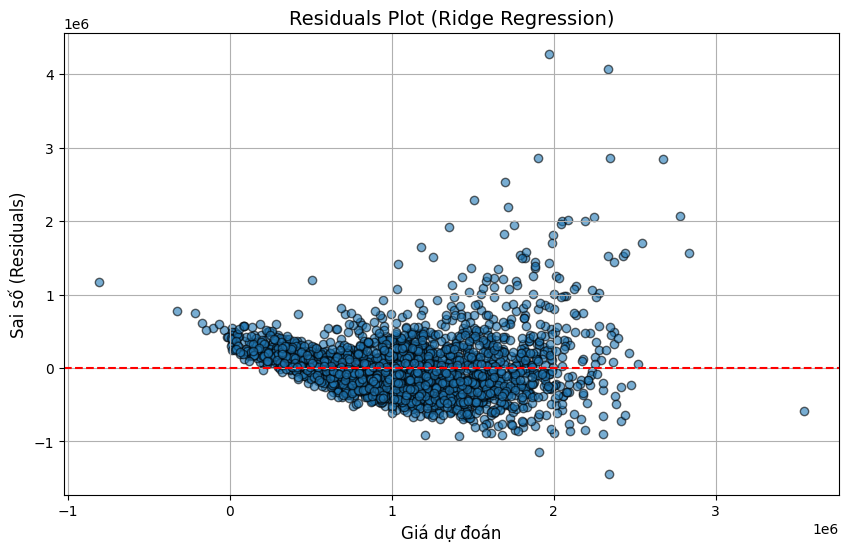

In [ ]:
# Residuals chart (error between prediction and reality)
residuals = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot (Ridge Regression)', fontsize=14)
plt.xlabel('Giá dự đoán', fontsize=12)
plt.ylabel('Sai số (Residuals)', fontsize=12)
plt.grid(True)
plt.show()



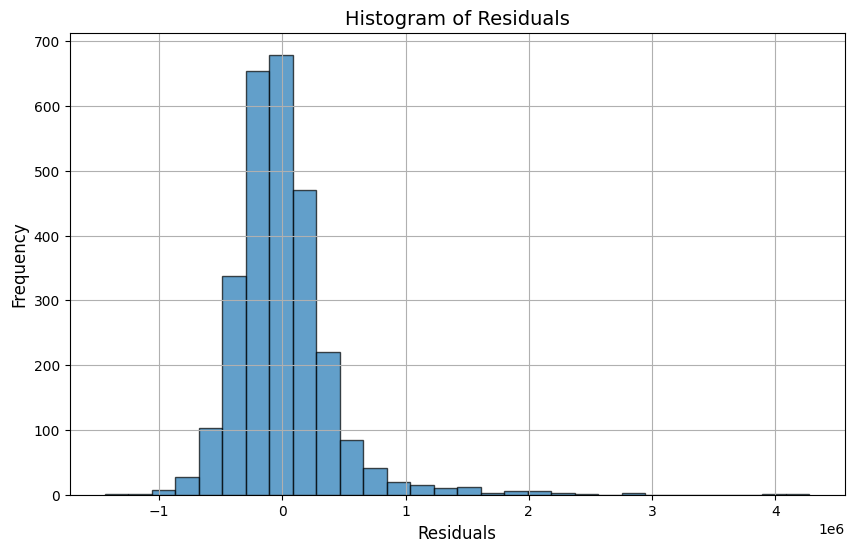

In [ ]:
# Distribution chart of error
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Predict sample

In [ ]:
from sklearn.feature_selection import SelectFromModel  # Or any other feature selection method you used
from sklearn.linear_model import LinearRegression

# Sample any 5 houses from the data
sample_data = data.sample(5, random_state=42)

# Prepare the input data by removing the 'Price' column (actual price)
sample_features_encoded = sample_data.drop(columns=['Price'])

# Normalize sample data
sample_features_scaled = scaler.transform(sample_features_encoded)
sample_features_selected = sample_features_scaled  # Use all scaled features
ridge_model = Ridge()  # Initialize the Ridge model
ridge_model.fit(X_train, y_train)
predicted_prices = ridge_model.predict(sample_features_selected)

# Add predicted price to sample data
sample_data['Predicted_Price'] = predicted_prices

# Display detailed information of any 5 houses with both actual and predicted prices
print(sample_data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                   'Landsize', 'BuildingArea', 'YearBuilt',
                   'Propertycount', 'Price', 'Predicted_Price']])

       Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
12780      3      11.2         3         1    1       327           111   
4751       2       3.8         2         2    2      2166          1260   
6930       3      12.4         3         1    1       599           107   
4860       3       4.5         3         2    1      8216           130   
6433       3      13.8         3         1    2       698           137   

       YearBuilt  Propertycount    Price  Predicted_Price  
12780       1960           2651   725000     8.121951e+05  
4751        1965           8648   820000     1.219456e+06  
6930        1960           5070   515000     7.281996e+05  
4860        1995           7717  1050000     1.732834e+06  
6433        1960           2698   870000     9.809035e+05  
